## Import libraries

In [31]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import mean
from skimage.io import imread
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Read Data

In [32]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Data Identification

In [33]:
data.shape

(48895, 16)

In [34]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [35]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#### Checking for missing values

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

#### Identifying and Replacing Missing Values

In [37]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [38]:
##Replacing missing values of reviews_per_month will be replaced with a score of 0.0
data['reviews_per_month'] = data['reviews_per_month'].fillna(0.0)

In [39]:
## We have replaced all the missing reviews_per_month with a 0.0

data['reviews_per_month'].isnull().value_counts() 

False    48895
Name: reviews_per_month, dtype: int64

#### Deleting Missing Values

In [40]:
#Deleting rows with missing name values
data.dropna(subset=['name'], inplace=True)

In [41]:
#Deleting rows with missing 'host_name' values
data.dropna(subset=['host_name'], inplace=True)

In [42]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
id                                48858 non-null int64
name                              48858 non-null object
host_id                           48858 non-null int64
host_name                         48858 non-null object
neighbourhood_group               48858 non-null object
neighbourhood                     48858 non-null object
latitude                          48858 non-null float64
longitude                         48858 non-null float64
room_type                         48858 non-null object
price                             48858 non-null int64
minimum_nights                    48858 non-null int64
number_of_reviews                 48858 non-null int64
last_review                       38821 non-null object
reviews_per_month                 48858 non-null float64
calculated_host_listings_count    48858 non-null int64
availability_365                  48858 non-null int64

#### Handling the outliers



### Price


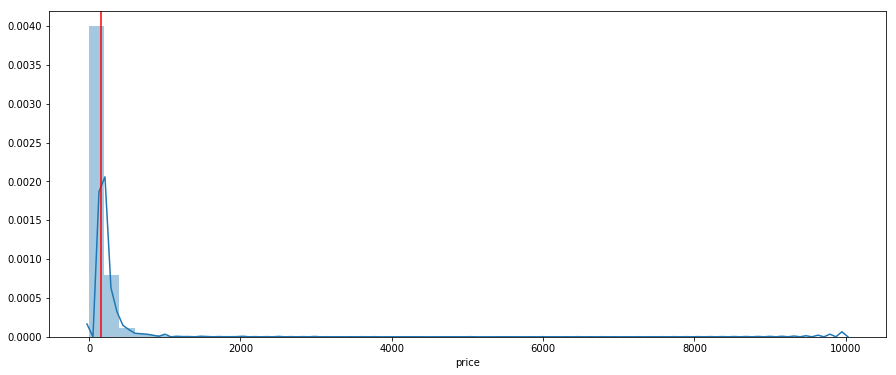

In [43]:
f,ax = plt.subplots(figsize=(15,6))
sns.distplot(data.price);
plt.axvline(data.price.mean(), color='r');


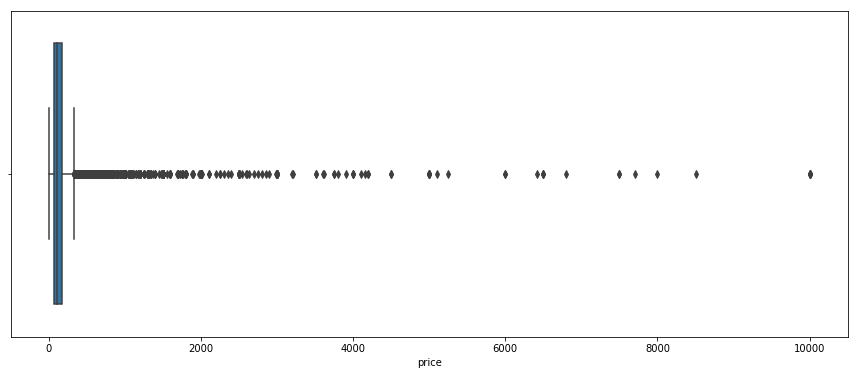

In [44]:
f,ax = plt.subplots(figsize=(15,6))
sns.boxplot(data.price);

In [45]:
data[data.price == 0].shape

(11, 16)

In [46]:
#using quantile approach to remove outliers.

min_threshold,max_threshold= data.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [47]:
data[data.price<min_threshold].shape #prices less than min threshold!


(403, 16)

In [48]:
df_n= data[(data.price>min_threshold)&(data.price<max_threshold)]


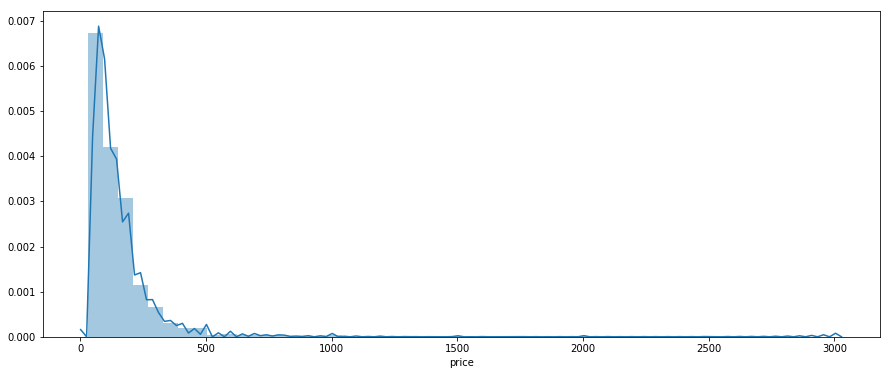

In [49]:
f,ax = plt.subplots(figsize=(15,6))
sns.distplot(df_n.price);

In [50]:
def outliers_detection(col):
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    return lower, upper

In [51]:
lower, upper = outliers_detection(data.price)
lower, upper

(-90.0, 334.0)

In [52]:
data= data[(data.price>lower)&(data.price<upper)]


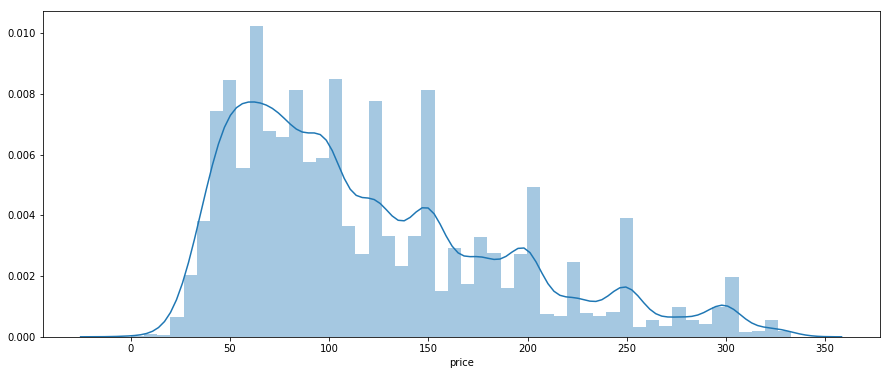

In [53]:
f,ax = plt.subplots(figsize=(15,6))
sns.distplot(data.price);

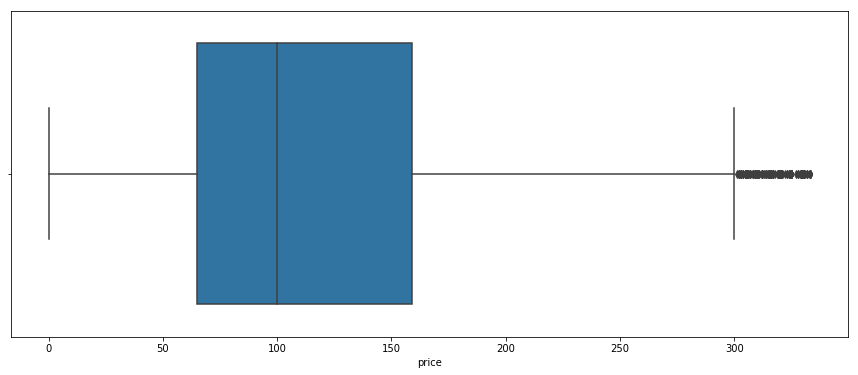

In [54]:
f,ax = plt.subplots(figsize=(15,6))
sns.boxplot(data.price);

In [55]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### EDA


#### Room Type

In [106]:
#Identifying number of rooms of each time
data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

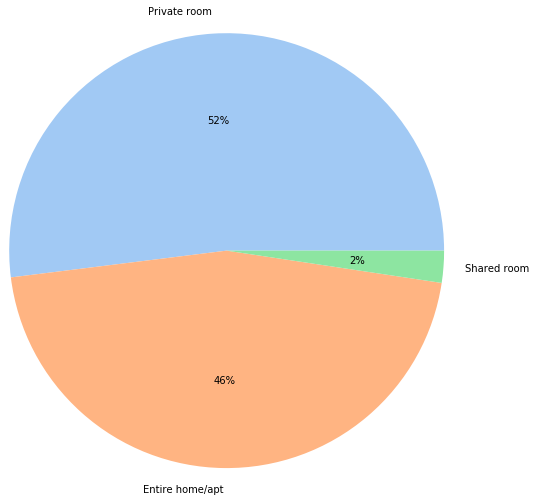

In [107]:
f, ax = plt.subplots(figsize=(15, 5))
colors = sns.color_palette('pastel')[0:3]
plt.pie(data.room_type.value_counts(sort=True),labels=data.room_type.unique(),autopct='%.0f%%', colors=colors, radius=2);

In [108]:
##rooms with price
rooms = data.groupby('room_type')['price']
rooms.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


Text(0.5, 1.0, 'Number of Rooms of Each Type')

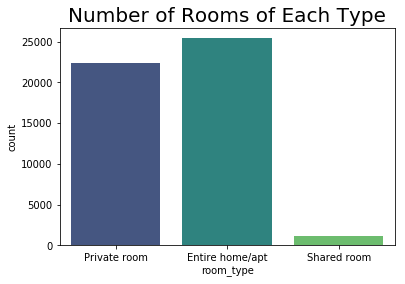

In [109]:
sns.countplot(x='room_type',data=data,palette='viridis')
plt.title("Number of Rooms of Each Type",fontsize=20)

#### Neighbourhood groups 

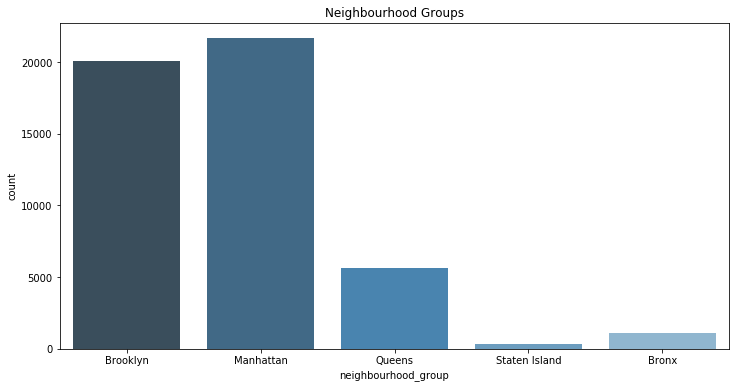

In [110]:
# different neighbourhood groups 
f,ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data.neighbourhood_group,palette='Blues_d');
ax.set_title('Neighbourhood Groups');

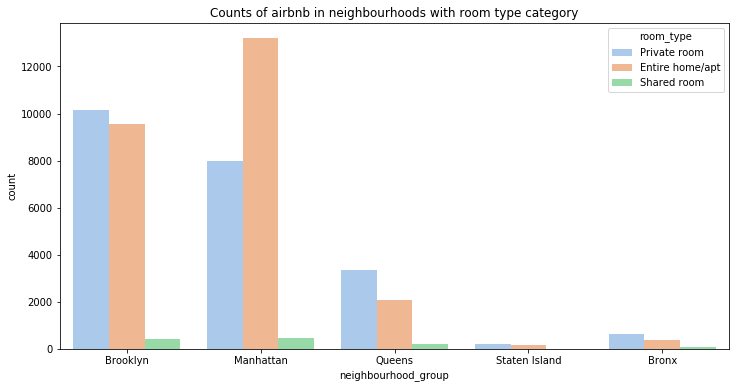

In [111]:
##Counts of airbnb in neighbourhoods with room type category
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='neighbourhood_group', hue='room_type', palette='pastel')
plt.title('Counts of airbnb in neighbourhoods with room type category');


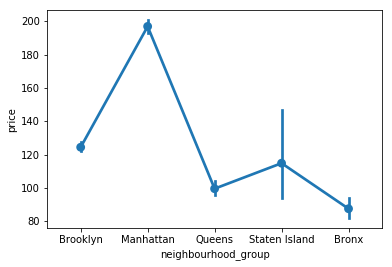

In [112]:
#looking for the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=data, estimator=mean)

#### top 10 hosts

In [113]:
#top 10 hosts on the basis of no of listings in entire NYC
top_10_hosts=data['host_name'].value_counts()[:10] 

In [114]:
top_10_hosts


Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

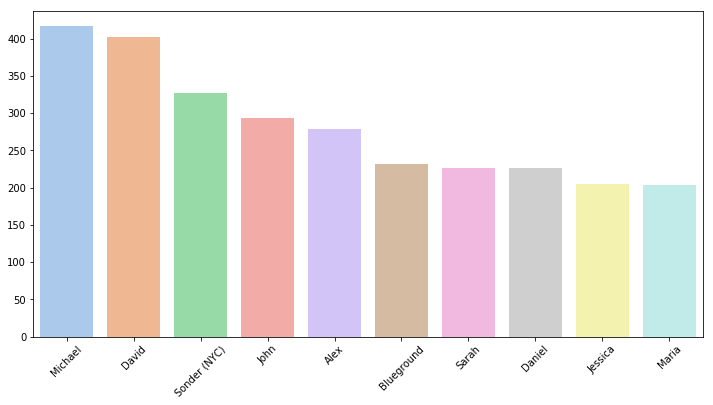

In [115]:
##Top 10 hostes by host_name
top_host = data.host_name.value_counts()[:10]
f,ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x = top_host.index,y=top_host.values,palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

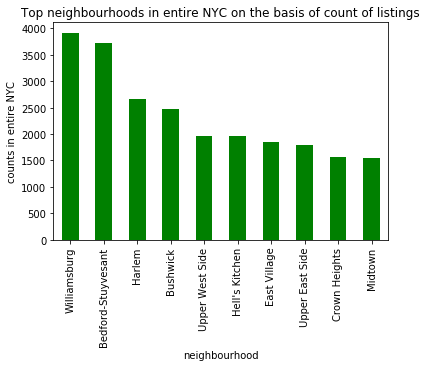

In [116]:
##checking top 10 neighbourhoods on the basis of no of listings in entire NYC
top_10_neigbours= data['neighbourhood'].value_counts()[:10] 
top_10_neigbours.plot(kind='bar',color='g')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

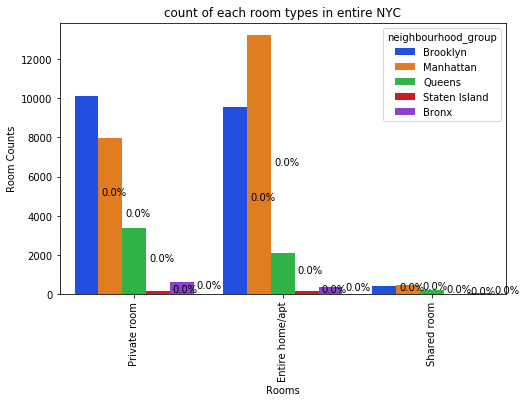

In [117]:
#count of each room types in entire NYC
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(x='room_type',hue='neighbourhood_group',data=data,palette='bright')

total = len(data['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

#### Availability

In [118]:
data['availability_365'].mean()

112.78132733408324

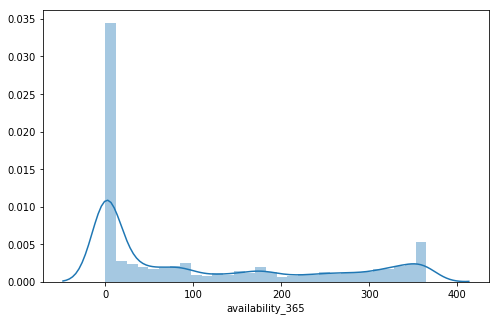

In [119]:
#distribution of listings availability at NYC!
sns.distplot(data['availability_365'])


#### check the expensive & cheapest listings with respect to prices leading in entire NYC

In [120]:
## Most Expensive
data.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
9151,Furnished room in Astoria apartment,Queens,Astoria,Kathrine,Private room
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Erin,Entire home/apt
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Jelena,Entire home/apt
6530,Spanish Harlem Apt,Manhattan,East Harlem,Olson,Entire home/apt
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Amy,Private room


In [121]:
##Cheapest
data.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
25796,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,Adeyemi,Private room
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Martial Loft,Private room
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Anisha,Private room
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Lauren,Private room
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,Kimberly,Private room


#### reviews on listings in NYC

In [122]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= data.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

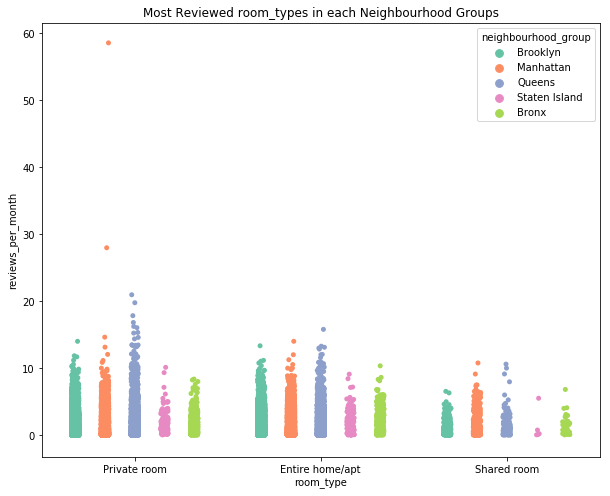

In [123]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=data,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

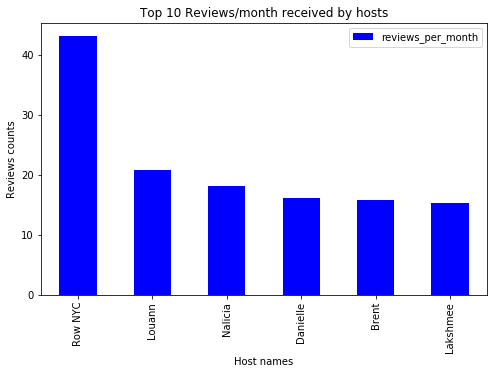

In [124]:
##10 reviewed hosts on the basis of reviews/month
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='b')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

#### lat&long

Text(0.5, 1.0, 'Location Co-ordinates')

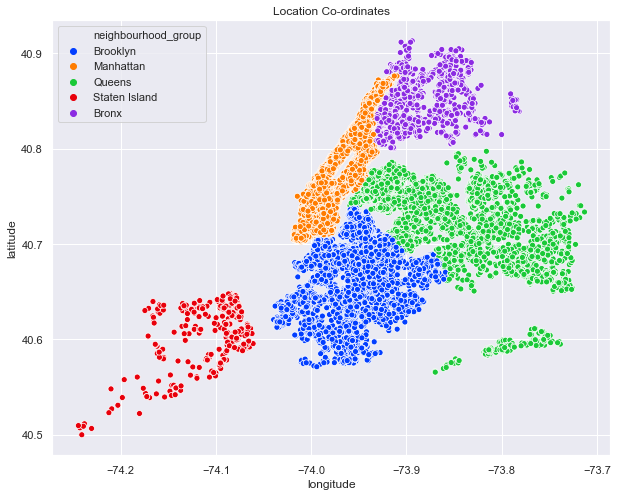

In [125]:
## find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=data, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

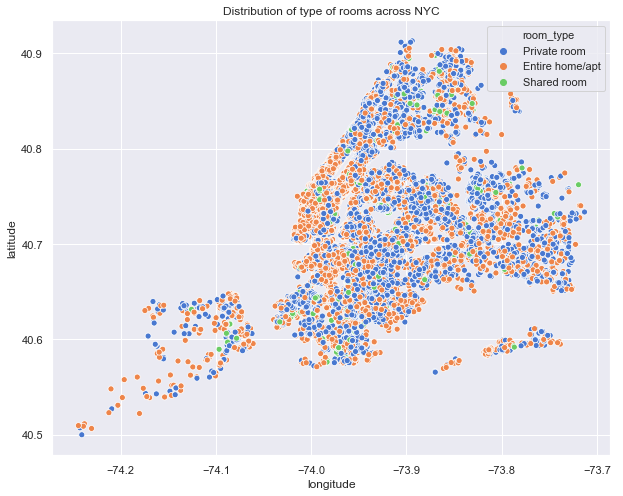

In [126]:
##observe the type of rooms as well
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=data.longitude, y=data.latitude,hue=data.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

## Data Preprocessing

In [97]:
#selecting useful columns
df = data[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','availability_365','price']]

In [98]:
df.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,availability_365,price
0,Brooklyn,Kensington,Private room,1,9,365,149
1,Manhattan,Midtown,Entire home/apt,1,45,355,225
2,Manhattan,Harlem,Private room,3,0,365,150
3,Brooklyn,Clinton Hill,Entire home/apt,1,270,194,89
4,Manhattan,East Harlem,Entire home/apt,10,9,0,80


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45882 entries, 0 to 48894
Data columns (total 7 columns):
neighbourhood_group    45882 non-null object
neighbourhood          45882 non-null object
room_type              45882 non-null object
minimum_nights         45882 non-null int64
number_of_reviews      45882 non-null int64
availability_365       45882 non-null int64
price                  45882 non-null int64
dtypes: int64(4), object(3)
memory usage: 2.8+ MB


In [100]:
#label encoding
df['neighbourhood_group'] = LabelEncoder().fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = LabelEncoder().fit_transform(df['neighbourhood'])
df['room_type'] = LabelEncoder().fit_transform(df['room_type'])

In [101]:
df.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,availability_365,price
0,1,107,1,1,9,365,149
1,2,126,0,1,45,355,225
2,2,93,1,3,0,365,150
3,1,41,0,1,270,194,89
4,2,61,0,10,9,0,80


In [102]:
X = df.drop('price',axis=1)


In [103]:
Y = df.price


In [104]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [105]:
#Standardization

In [81]:
#firt way by min_max_scaler
min_max_scaler = preprocessing.MinMaxScaler()

In [82]:
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [106]:
#second way by StandardScaler

In [107]:
from sklearn.preprocessing import StandardScaler


In [108]:
ss = StandardScaler()

In [109]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mariam k\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  


## Applying Machine Learning Model

In [110]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
Y_pred1=reg.predict(X_test)


In [112]:
from sklearn.metrics import r2_score
acc1=r2_score(Y_test,Y_pred1)

In [113]:
acc1

0.39297964745659186

In [114]:
#Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,Y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.0001,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [115]:
Y_pred2=DTree.predict(X_test)

In [116]:
acc2=r2_score(Y_test,Y_pred2)

In [117]:
acc2

0.4078460802788594

In [118]:
#Random forest Model
from sklearn.ensemble import RandomForestRegressor
R=RandomForestRegressor()
R.fit(X_train,Y_train)

C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [119]:
Y_pred3=R.predict(X_test)

In [120]:
acc3=r2_score(Y_test,Y_pred3)

In [121]:
acc3

0.46313887957629807

In [122]:
#Ensemble Model
Y_pred_ensemble = (Y_pred1+Y_pred2+Y_pred3)/3


In [123]:
acc_ensemble = (r2_score(Y_test,Y_pred_ensemble))
print(acc_ensemble)

0.5075142175631673


In [124]:
performance = pd.DataFrame([acc1,acc2,acc3,acc_ensemble],index=['Model 1','Model 2','Model 3','Ensemble Model'],columns=['Accuracy'])

In [125]:
performance

,Accuracy
Model 1,0.392980
Model 2,0.407846
Model 3,0.463139
Ensemble Model,0.507514


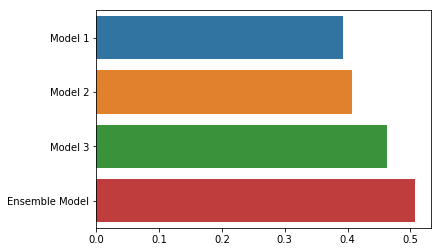

In [126]:
sns.barplot(x=performance.Accuracy.values,y=performance.Accuracy.index)
